[*********************100%%**********************]  1 of 1 completed


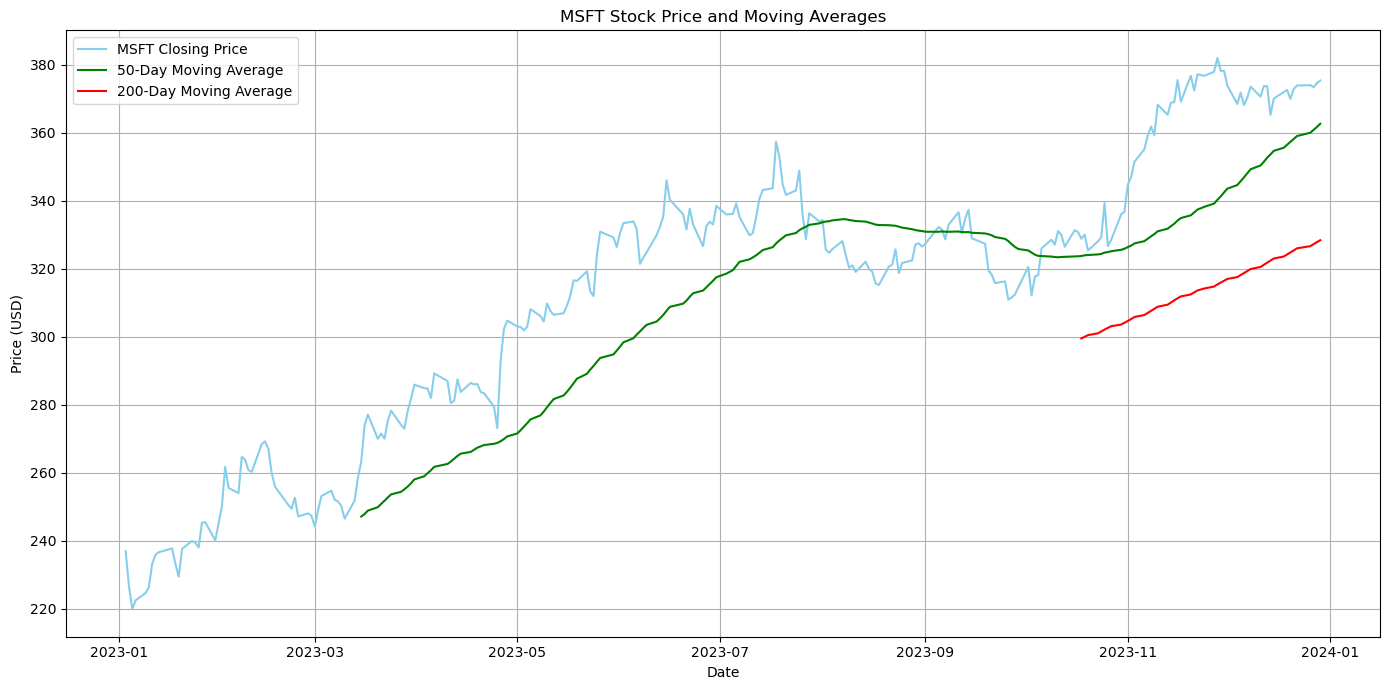

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch historical data for AAPL over the last year
ticker = "MSFT"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Calculate 50-day and 200-day moving averages
data['50_MA'] = data['Adj Close'].rolling(window=50).mean()
data['200_MA'] = data['Adj Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Adj Close'], label=f'{ticker} Closing Price', color='skyblue')
plt.plot(data.index, data['50_MA'], label='50-Day Moving Average', color='green')
plt.plot(data.index, data['200_MA'], label='200-Day Moving Average', color='red')

# Beautify the plot
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%%**********************]  5 of 5 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


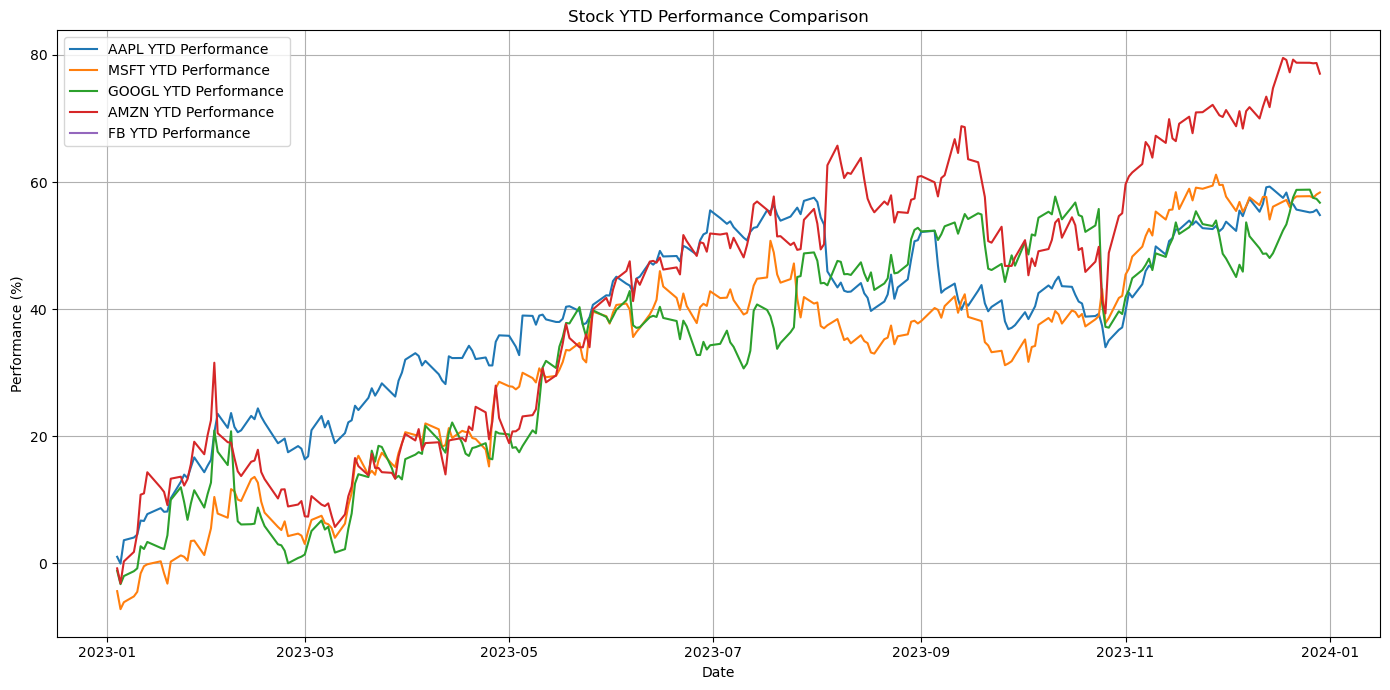

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the stock symbols for comparison
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']

# Fetch the historical data from the start of the current year
start_date = "2023-01-01"
end_date = "2024-01-01"
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate the YTD performance as percentage
ytd_performance = ((data.pct_change() + 1).cumprod() - 1) * 100

# Plotting  
plt.figure(figsize=(14, 7))

# Plot each stock's YTD performance
for stock in stocks:
    plt.plot(ytd_performance.index, ytd_performance[stock], label=f'{stock} YTD Performance')

# Beautify the plot
plt.title('Stock YTD Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

[*********************100%%**********************]  5 of 5 completed


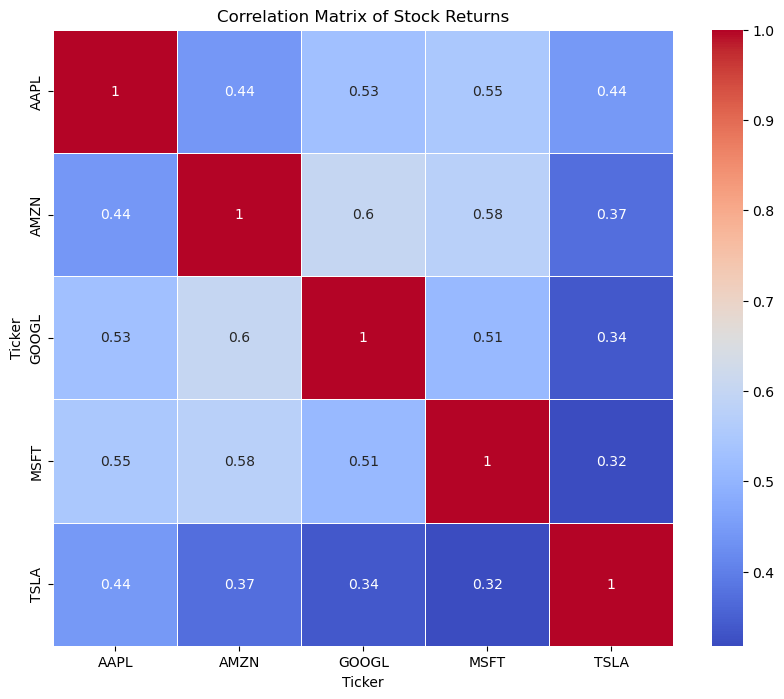

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the stock symbols for the analysis
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical data for the last year
start_date = "2023-01-01"
end_date = "2024-01-01"
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate the correlation matrix of daily returns
correlation_matrix = daily_returns.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Stock Returns')

# Show the plot
plt.show()

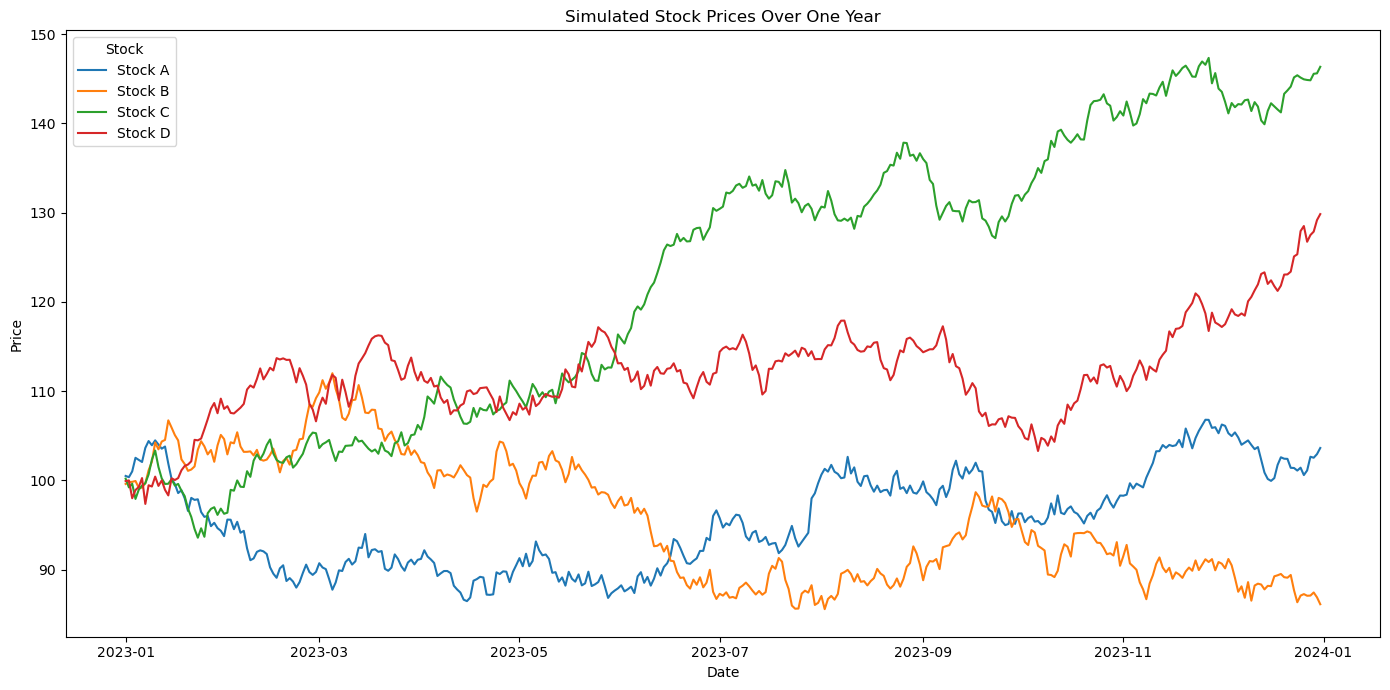

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a date range for one year
dates = pd.date_range(start="2023-01-01", end="2023-12-31")

# Simulate daily closing prices for 4 stocks using random walk
np.random.seed(42)  # For reproducible results
stocks = ['Stock A', 'Stock B', 'Stock C', 'Stock D']
prices = pd.DataFrame(index=dates, columns=stocks)

for stock in stocks:
    # Start price for each stock is 100
    prices[stock] = 100 + np.cumsum(np.random.randn(len(dates)))

# Melting the DataFrame for easier plotting with seaborn
prices_melted = prices.reset_index().melt(id_vars=['index'], var_name='Stock', value_name='Price')

# Plotting with seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=prices_melted, x='index', y='Price', hue='Stock')

# Beautify the plot
plt.title('Simulated Stock Prices Over One Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Stock')
plt.tight_layout()

# Show the plot
plt.show()